In [2]:
import torch                          # Le cœur de PyTorch : tensors, calculs, GPU
import torch.nn as nn                 # Contient toutes les couches du réseau (Conv2D, Linear, etc.)
import torch.optim as optim           # Optimiseurs pour entraîner le modèle (Adam, SGD, etc.)
from torch.utils.data import DataLoader  # Pour gérer le batching et le shuffle des datasets
from torch.utils.data import random_split
from torchvision import datasets, transforms, models  # Outils pour datasets, transformations et modèles pré-entraînés


import numpy as np                    # Manipulation de tableaux, conversion images → tensors
import pandas as pd                   # Pour lire et écrire le fichier test_template.csv
import os                             # Gestion des fichiers et dossiers

# -----------------------------
# Librairies pour la visualisation
# -----------------------------
import matplotlib.pyplot as plt       # Visualiser les images et tracer des courbes

# -----------------------------
# Librairies pour la vision par ordinateur
# -----------------------------
import cv2                            # Capturer la webcam et détecter les visages
from PIL import Image 
from skimage import io
import matplotlib.pyplot as plt
import os, random

Text(0.5, 1.0, 'neutral')

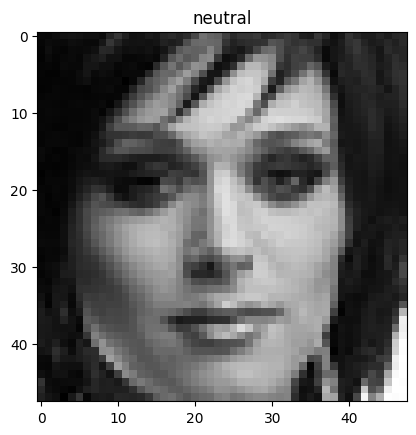

In [11]:
emotions = ['neutral', 'angry', 'fear', 'happy', 'sad', 'surprise', 'disgust']
emotion = 'neutral'
x = random.randint(0, 6)
path = f'data/dataTrain/train/{emotion}/'
img = io.imread(os.path.join(path, random.choice(os.listdir(path))))
plt.imshow(img, cmap='gray')
plt.title(emotion)
# plt.show()

In [15]:
import os

for emotion in os.listdir('data/dataTrain/train'):
    print(emotion, ":", len(os.listdir(os.path.join('data/dataTrain/train', emotion))))


happy : 7215
sad : 4830
fear : 4097
surprise : 3171
neutral : 4965
angry : 3995
disgust : 436


In [5]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels = 3),            # images en niveaux de gris
    transforms.Resize((224, 224)),       # redimensionne à 48x48
    transforms.ToTensor(),             # convertit en tenseur [0,1]
    transforms.Normalize(mean=(0.485, 0.456, 0.406),
                         std=(0.229, 0.224, 0.225)) # normalise entre -1 et 1
])

train_data = datasets.ImageFolder("data/dataTrain/train", transform=transform)
test_data  = datasets.ImageFolder("data/dataTest",  transform=transform)


In [18]:
train_size = int (0.8 * len(train_data))
validation_size = len(train_data) - train_size
train_dataset, validation_dataset = random_split(train_data, [train_size, validation_size])
test_loader  = DataLoader(test_data, batch_size=64, shuffle=False)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=64, shuffle=True)



28709
torch.Size([64, 1, 48, 48])
torch.Size([64])
tensor([5, 3, 4, 3, 6, 5, 2, 3, 4, 3])


In [24]:
#création du modèle
nbEmotions = 7
modeleEmotions = models.resnet18(pretrained=True)
modeleEmotions.fc = nn.Linear(512, nbEmotions)

for param in modeleEmotions.parameters():
    param.requires_grad = False

# On dé-gèle seulement la dernière couche
for param in modeleEmotions.fc.parameters():
    param.requires_grad = True


print(modeleEmotions)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
#loss function
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modeleEmotions = modeleEmotions.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modeleEmotions.fc.parameters(), lr=1e-3)
